## Explore the provided data

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ase
import ase.io
import ase.visualize


In [2]:
# make project package importable, hardcoded to current folder level of this specific notebook. 
# Add more `.parent` or remove when called from a different level.
import sys
project_path = str(Path.cwd().parent.parent)
if project_path not in sys.path:
    sys.path.append(project_path)

In [3]:
import sisclab22p6.data
filepath_data = "../../data/jij"
filename_table = "d_block_magnetic_data_modified.csv"
filename_structures = "dimer_clusters.extxyz"
table = sisclab22p6.data.load_jij_data(filepath = filepath_data, 
                                       filename_table=filename_table, 
                                       filename_structures=filename_structures)

Loaded Number samples: 1730, 1730.


In [4]:
table.head()

workchain_label  imp0  imp1  ilayer0  ilayer1  offset0  offset1  \
0  Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0        1   
1   Sc:Y:Bi2Te3_il_3_3_Off_1    21    39        3        3        0        1   
2  Sc:Sc:Bi2Te3_il_3_3_Off_1    21    21        3        3        0        1   
3  Mn:Sc:Bi2Te3_il_3_3_Off_1    25    21        3        3        0        1   
4  Cr:Sc:Bi2Te3_il_3_3_Off_1    24    21        3        3        0        1   

                                           structure             J  \
0  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  1.242709e-02   
1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i... -2.337413e-21   
2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i... -5.764835e-21   
3  (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...  8.237921e-02   
4  (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...  3.978618e-02   

              D  ...  KKR_rcut1  KKR_rcut_unit        rx   ry   rz         r  \
0  2.952999e-03  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
1  3.586830e-22  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
2  1.383125e-21  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
3  8.294382e-03  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
4  2.661418e-02  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   

           mom1          mom2       tot_mom  \
0  1.856702e-06  8.152756e-01  8.152775e-01   
1 -4.173850e-11 -3.308398e-11 -7.482248e-11   
2 -4.285949e-11 -4.675482e-11 -8.961432e-11   
3  4.409489e+00  1.069743e-02  4.420186e+00   
4  3.815394e+00  4.514470e-03  3.819909e+00   

                               jij_uuid  
0  9ec53578-777c-4884-a3a7-084ad3586748  
1  b218302c-a882-46f3-b4d7-e148d9f1cb0b  
2  19f51d50-b554-4eb1-b106-a9e78a1831f4  
3  93cdd1c9-1cb4-4674-aefd-f427f7d23ef8  
4  de909ef1-e7c6-4566-b585-1c0d3f072f40  

[5 rows x 24 columns]

In [5]:
structure = table.iloc[:,7]
structure

0       (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...
1       (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...
2       (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...
3       (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...
4       (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...
                              ...                        
1725    (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...
1726    (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...
1727    (Atom('Mo', [0.0, 0.0, 0.0], mass=95.96, index...
1728    (Atom('Nb', [0.0, 0.0, 0.0], mass=92.90638, in...
1729    (Atom('Nb', [0.0, 0.0, 0.0], mass=92.90638, in...
Name: structure, Length: 1730, dtype: object

In [6]:
J = table.iloc[:,8]

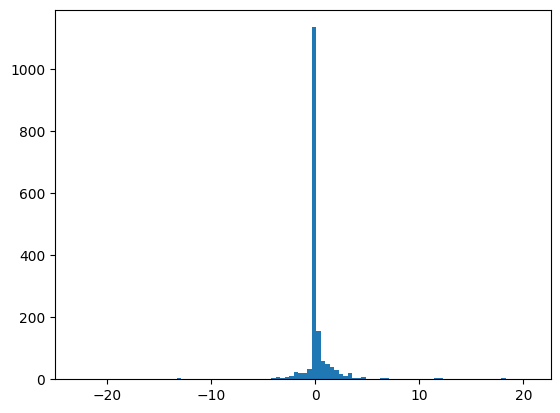

In [7]:
plt.hist(np.array(table['J']), bins = 100)
plt.show()

## Create a benchmark study to learn the Jij interaction (column J in the provided data table) from the provided structures. 
As descriptors, use Coulomb Matrix and SOAP. As models, use KRR and GPR. Compare the implementations in DScribe, scikit-learn and librascal implementations. 

### Coulomb Matrix

In [8]:
from dscribe.descriptors import CoulombMatrix

# Setting up the CM descriptor
cm = CoulombMatrix(
    n_atoms_max=22,
    permutation='sorted_l2'
)

In [9]:
#from ase.io import read

sample = []
for i in range (len(structure)):
    atoms = structure[i]
    #print(atoms.symbols)
    sample.append(atoms)   

coulomb_matrices = cm.create(sample, n_jobs=2)  # Parallel
print(coulomb_matrices)
print("flattened", coulomb_matrices.shape)

[[6567.16652708  603.32606202  616.93422954 ...    0.
     0.            0.        ]
 [6567.16652708  603.32606202  616.93422954 ...    0.
     0.            0.        ]
 [6567.16652708  603.32606202  616.93422954 ...    0.
     0.            0.        ]
 ...
 [6567.16652708  308.46711439  603.32606202 ...    0.
     0.            0.        ]
 [6567.16652708  308.46711439  603.32606202 ...    0.
     0.            0.        ]
 [6567.16652708  308.46711439  603.32606202 ...    0.
     0.            0.        ]]
flattened (1730, 484)


In [10]:
# set CoulombMatrix as features
x = coulomb_matrices

# set J as target labels
y = table.iloc[:,8]

In [11]:
print(x.shape)
print(y.shape)

(1730, 484)
(1730,)


In [12]:
import math, random

rand_mol = random.randint(0, len(y))
print(x[rand_mol])

[6567.16652708  616.93422954  616.93422954  468.90219881  721.54111634
  721.54111634  431.34668838  603.326062    603.326062    418.36559548
  346.25735772  346.25735772  755.10775248  417.83638065    0.
    0.            0.            0.            0.            0.
    0.            0.          616.93422954 6567.16652708  616.93422949
  721.54111634  721.54111636  468.90219878  603.326062    603.32606202
  431.34668836  346.25735772  418.36559548  346.25735771  755.10775244
  417.83638064    0.            0.            0.            0.
    0.            0.            0.            0.          616.93422954
  616.93422949 6567.16652708  721.54111634  468.90219878  721.54111636
  603.326062    431.34668836  603.32606202  346.25735772  346.25735771
  418.36559548  755.10775244  417.83638064    0.            0.
    0.            0.            0.            0.            0.
    0.          468.90219881  721.54111634  721.54111634 6567.16652708
  616.93422954  616.93422954  418.36559483  34

In [13]:
x[rand_mol].shape

(484,)

<Figure size 640x480 with 0 Axes>

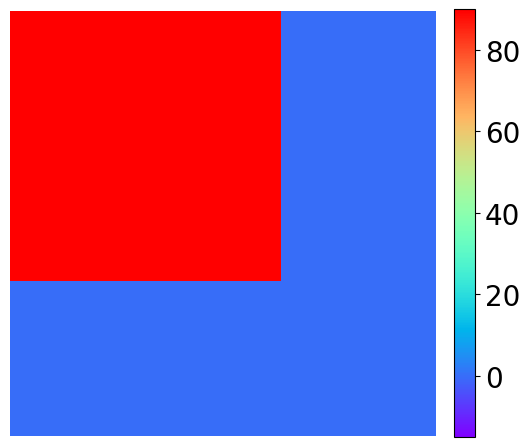

In [14]:
# Visualize the Coulomb matrix of the random molecule.

import matplotlib.pyplot as plt

shape = (22, 22)
mat = x[rand_mol].reshape(shape)

plt.figure()
plt.figure(figsize = (6,6))
plt.imshow(mat, origin="upper", cmap='rainbow', vmin=-15, vmax=90, interpolation='nearest')
plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=20)
plt.axis('off')
plt.show()

In [15]:
## shuffle the data
import random

c = list(zip(x, y))
random.shuffle(c)

x, y = zip(*c)

x = np.array(x)
y = np.array(y)

print(y)

[-3.86643488e-20  2.35043251e+00  2.22120372e+00 ... -2.69363834e+00
  1.72650628e-20  2.84678032e-02]


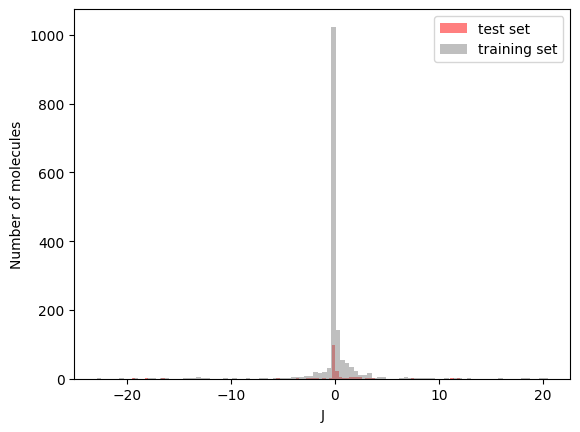

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("J")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

### KRR

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the Coulomb matrices in the training set 
# to their corresponding Jij.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.586 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.306 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.438 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.628 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.372 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.505 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.628 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.372 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.505 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.586 total time=   0.3s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.306 total time=   0.2s
[CV 3

GridSearchCV(cv=3, estimator=KernelRidge(),
             param_grid=[{'alpha': array([0.0001, 0.001 , 0.01  ]),
                          'gamma': array([0.0001, 0.001 , 0.01  ]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=3)

Mean absolute error on test set: 0.280 eV


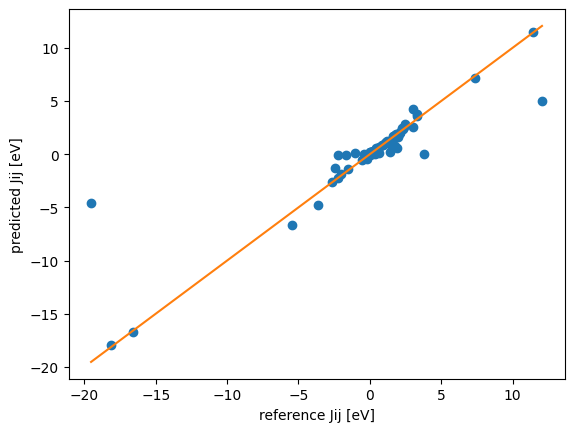

R^2 score on test set: 0.798


In [18]:
# predicted Jij for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [eV]')
plt.ylabel('predicted Jij [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

### SOAP

In [19]:
# get structures from table
structures =  list(table.structure)

# get arrays indices of defect atoms
# assumption: all defect atoms are transition metals and have atomic numbers < host crystal atomic numbers (Bi: 83, Te: 52)
defect_atoms_indices = [list(np.asarray(struc.numbers < 52).nonzero()[0]) for struc in structures]
# check that all index pairs are equal, if so, flatten the list
if not all(index_pair == defect_atoms_indices[0] for index_pair in defect_atoms_indices):
    raise Exception("Not all defect atoms indices equal. Have to do by-case featurization.")
defect_atoms_indices = defect_atoms_indices[0]

# get Euclidean coordinates of the defect atoms
positions = [[struc.positions[idx] for idx in defect_atoms_indices] for struc in structures]
# DScribe SOAP needs positions per structure. So do not flatten the list, as we did with indices.

In [20]:
# get chemical species present in the input structures.
species = set(np.concatenate([np.unique(struc.numbers) for struc in structures]))

In [ ]:
'''
from sklearn.model_selection import ParameterGrid
param_grid = {'n_max': [1, 2, 3], 'l_max': [1, 2, 3]}
'''

In [21]:
from dscribe.descriptors import SOAP

In [36]:
# Setting up the SOAP descriptor
soap = SOAP(
    species=species, #["Sc", "Ti", "Bi", "Te", "Y", "Mn", "Cr", "Nb", "Tc", "Mo", "Ag", "Cd", "Ni", "Cu", "Rh", "Zr", "Fe", "Ru", "Pd", "Zn", "V", "Co"],
    periodic=False,
    r_cut=4.0,
    n_max=3,
    l_max=3,
    average='inner'
)

In [37]:
len(structures)

1730

In [38]:
samples = structures
#samples

In [39]:
samples = sample[:]
positions = np.zeros((len(samples),1), dtype=int)

#n_features = soap.get_number_of_features()

positions = [[0,7] for i in range(len(samples))]

soap = soap.create(samples, positions, n_jobs=2)  # Parallel


#print(coulomb_matrices.shape)
#coulomb_matrices = coulomb_matrices.reshape(len(samples),-1)
#print(coulomb_matrices.shape)

In [40]:
soap[2]

array([ 0.03001198,  0.46537796,  1.13862185, ...,  0.04236515,
       -0.09541532,  0.21491842])

In [41]:
soap.shape

(1730, 8064)

In [42]:
# set soap as features
x = soap

# set J as target labels
y = table.iloc[:,8]

In [43]:
import math, random

rand_mol = random.randint(0, len(y))
print(x[rand_mol])
x.shape

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.36214773e-17
 -3.02379403e-17  6.74778785e-17]


(1730, 8064)

In [44]:
#reshape feature x from (1730,2,10080) to (1730, 20160)
b = []
for i in range(len(samples)):
    a = np.concatenate((x[i,0],x[i,1]), axis=None)
    b.append(a)
x=b

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [46]:
## shuffle the data

c = list(zip(x, y))
random.shuffle(c)

x, y = zip(*c)

x = np.array(x)
y = np.array(y)

print(x)

[[0.         0.        ]
 [0.17068285 0.21360303]
 [0.         0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


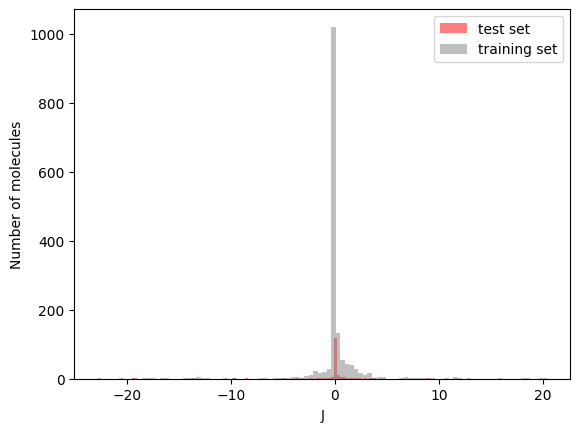

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("J")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.988 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.953 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.898 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.987 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.953 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.898 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.986 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.952 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.895 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.988 total time=   0.1s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.954 total time=   0.2s
[CV 3

Mean absolute error on test set: 0.758 eV


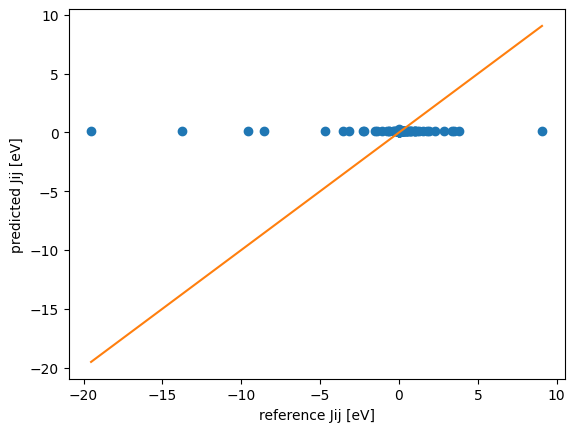

R^2 score on test set: -0.017


In [49]:
# predicted Jij for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [eV]')
plt.ylabel('predicted Jij [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

## Add Adaboost

In [383]:
from sklearn.ensemble import AdaBoostRegressor

my_base_model= KernelRidge(alpha=0.001, gamma=0.001, kernel='rbf')
clf = AdaBoostRegressor(n_estimators=100, random_state=42, base_estimator=my_base_model)
clf.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=KernelRidge(alpha=0.001, gamma=0.001,
                                             kernel='rbf'),
                  n_estimators=100, random_state=42)

Mean absolute error on test set: 1.173 eV


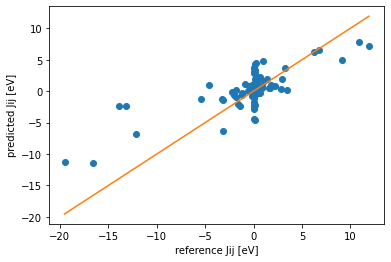

R^2 score on test set: 0.573


In [384]:
y_pred = clf.predict(x_test)
print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [eV]')
plt.ylabel('predicted Jij [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

## Decision tree regressor

In [388]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

param_grid = {"criterion": ['squared_error','friedman_mse','absolute_error', 'poisson'],
              "splitter":['best','random']}

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(DecisionTreeRegressor(),
                           param_grid, 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3) 

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END criterion=squared_error, splitter=best;, score=-0.681 total time=   5.5s
[CV 2/3] END criterion=squared_error, splitter=best;, score=-0.772 total time=   5.9s
[CV 3/3] END criterion=squared_error, splitter=best;, score=-0.651 total time=   4.6s
[CV 1/3] END criterion=squared_error, splitter=random;, score=-0.736 total time=   4.8s
[CV 2/3] END criterion=squared_error, splitter=random;, score=-0.734 total time=   4.8s
[CV 3/3] END criterion=squared_error, splitter=random;, score=-0.613 total time=   4.7s
[CV 1/3] END criterion=friedman_mse, splitter=best;, score=-0.721 total time=   5.2s
[CV 2/3] END criterion=friedman_mse, splitter=best;, score=-0.774 total time=   5.9s
[CV 3/3] END criterion=friedman_mse, splitter=best;, score=-0.670 total time=   4.7s
[CV 1/3] END criterion=friedman_mse, splitter=random;, score=-0.735 total time=   5.3s
[CV 2/3] END criterion=friedman_mse, splitter=random;, score=-0.802 total ti

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 178, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regre

{'criterion': 'absolute_error', 'splitter': 'random'}


Mean absolute error on test set: 0.848 eV


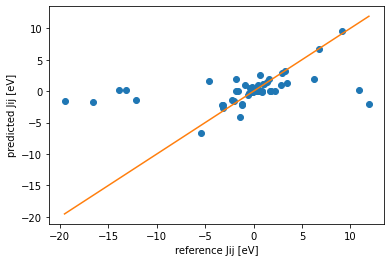

R^2 score on test set: 0.162


In [389]:
# predicted Jij for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [eV]')
plt.ylabel('predicted Jij [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

### Add Adaboost

In [408]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

param_grid = {'base_estimator__max_depth':[i for i in range(2,4,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[50,100],
              'learning_rate':[0.01,0.1]}

clf = GridSearchCV(abr, param_grid, scoring = 'neg_mean_absolute_error', cv=3, verbose=3)
clf.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50;, score=-0.949 total time=  22.9s
[CV 2/3] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50;, score=-0.923 total time=  21.3s
[CV 3/3] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=50;, score=-0.873 total time=  23.7s
[CV 1/3] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=100;, score=-0.927 total time=  46.1s
[CV 2/3] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=100;, score=-0.926 total time=  47.9s
[CV 3/3] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=100;, score=-0.890 total time=  45.2s
[CV 1/3] END base_estimator__max_depth=2, base_es

GridSearchCV(cv=3,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'base_estimator__max_depth': [2],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_absolute_error', verbose=3)

Mean absolute error on test set: 1.086 eV


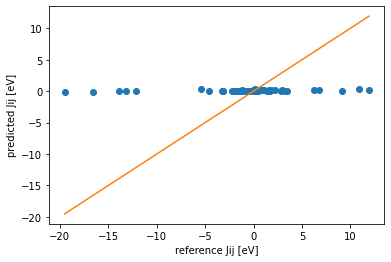

R^2 score on test set: 0.009


In [409]:
y_pred = clf.predict(x_test)
print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [eV]')
plt.ylabel('predicted Jij [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {"criterion": ['squared_error','friedman_mse','absolute_error', 'poisson']}

scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv = 3, scoring = scoring_function, verbose=3) 

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

In [ ]:
y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [eV]')
plt.ylabel('predicted Jij [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

## GPR

### Coulumb Matrix

### SOAP